In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from qvalue import estimate
from glob import iglob
from scipy.stats import mannwhitneyu

In [81]:
# Load the ExAC nsSNV results
ns  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-27/exac/daf_K_summary.txt",delimiter='\t')
ns  = ns.drop_duplicates(["structid","chain"])
ns.ix[~ns[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(ns.ix[~ns[ "Kp"].isnull(), "Kp"].values)
ns.ix[~ns["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(ns.ix[~ns["wKp"].isnull(),"wKp"].values)

In [82]:
# Load the ExAC singleton nsSNV results
sng  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-30/singleton/daf_K_summary.txt",delimiter='\t')
sng  = sng.drop_duplicates(["structid","chain"])
sng.ix[~sng[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(sng.ix[~sng[ "Kp"].isnull(), "Kp"].values)
sng.ix[~sng["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(sng.ix[~sng["wKp"].isnull(),"wKp"].values)

In [83]:
# Load the ExAC rare nsSNV results
rar = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-20/rare/daf_K_summary.txt",delimiter='\t')
rar = rar.drop_duplicates(["structid","chain"])
rar.ix[~rar[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(rar.ix[~rar[ "Kp"].isnull(), "Kp"].values)
rar.ix[~rar["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(rar.ix[~rar["wKp"].isnull(),"wKp"].values)

In [84]:
# Load the ExAC rare nsSNV results
cmn = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-20/common/daf_K_summary.txt",delimiter='\t')
cmn  = cmn.drop_duplicates(["structid","chain"])
cmn.ix[~cmn[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(cmn.ix[~cmn[ "Kp"].isnull(), "Kp"].values)
cmn.ix[~cmn["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(cmn.ix[~cmn["wKp"].isnull(),"wKp"].values)

In [85]:
def prep_split(dfx,weighted=False):
    df  = dfx.copy()
    if not weighted:
        df['fdr']  = 'All (N=%4d)'%len(df[~df["Kz"].isnull()])
    else:
        df['fdr']  = 'All (N=%4d)'%len(df[~df["wKz"].isnull()])
    if not weighted:
        dft = dfx[dfx["Kq"]<0.1].copy()
    else:
        dft = dfx[dfx["wKq"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1'
    if not weighted:
        df = pd.concat((df,dft)).dropna(subset=["Kz"])
    else:
        df = pd.concat((df,dft)).dropna(subset=["wKz"])
    df['dummy'] = ''
    return df

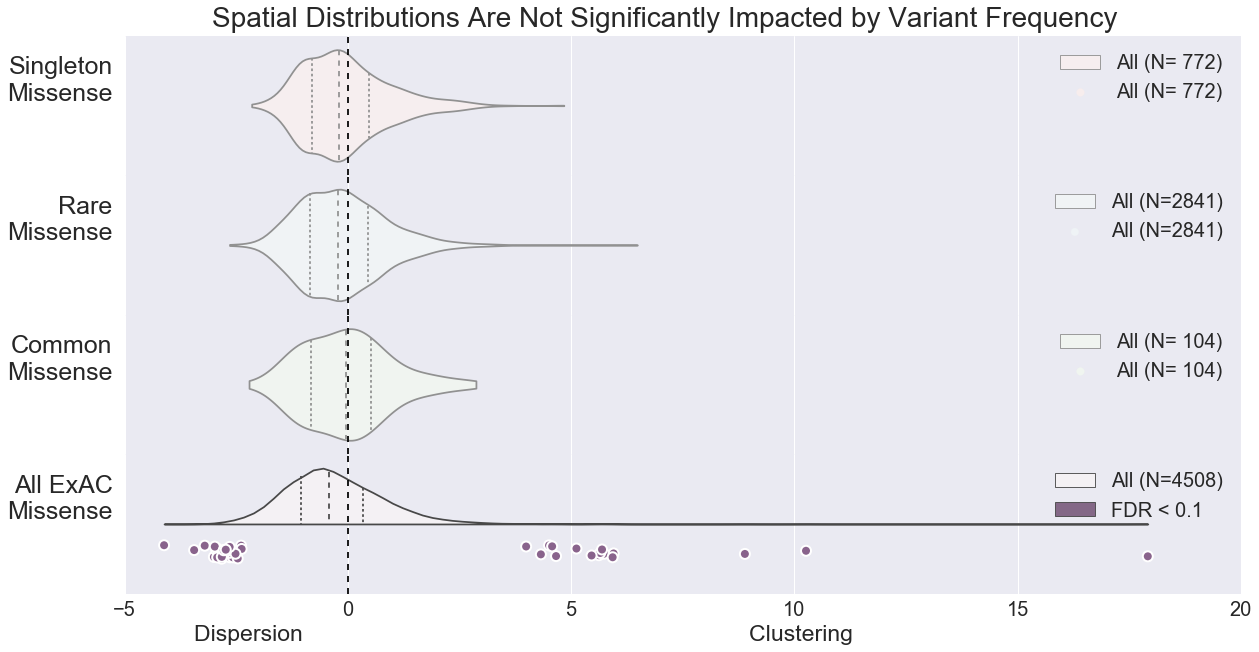

In [86]:
# Setup the plot
fig,ax = plt.subplots(4,1,figsize=(20,10),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC singleton missense SNVs
df    = prep_split(sng)
split = len(df["fdr"].drop_duplicates())>1
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[0],split=split,scale='width',cut=0,ax=ax[0])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[0],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[0])
ax[0].set_ylabel("Singleton\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC rare missense SNVs
df = prep_split(rar)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','Kz'] = np.nan
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[1],split=split,scale='width',cut=0,ax=ax[1])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[1],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[1])
ax[1].set_ylabel("Rare\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC common missense SNVs
df = prep_split(cmn)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','Kz'] = np.nan
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[2],split=split,scale='width',cut=0,ax=ax[2])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[2],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[2])
ax[2].set_ylabel("Common\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC common missense SNVs
df = prep_split(ns)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','Kz'] = np.nan
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[3],split=split,scale='width',cut=0,ax=ax[3])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[3],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[3])
ax[3].set_ylabel("All ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*70,' '*50),fontsize=23)
for x in ax:
    x.axvline(x=0,c='black',ls='dashed')
plt.xlim([-5,20])
plt.suptitle("Spatial Distributions Are Not Significantly Impacted by Variant Frequency",fontsize=28,y=0.94)
plt.show()

In [87]:
print "Mann-Whitney U Comparisons"
u,p = mannwhitneyu(sng["Kz"],rar["Kz"])
print "Singleton-Rare:   p=%g"%p
u,p = mannwhitneyu(rar["Kz"],cmn["Kz"])
print "Rare-Common:      p=%g"%p
u,p = mannwhitneyu(sng["Kz"],cmn["Kz"])
print "Singleton-Common: p=%g"%p
u,p = mannwhitneyu(ns["Kz"],sng["Kz"])
print "All-Singleton:    p=%4.2g"%p
u,p = mannwhitneyu(ns["Kz"],rar["Kz"])
print "All-Rare:         p=%4.2g"%p
u,p = mannwhitneyu(ns["Kz"],cmn["Kz"])
print "All-Common:       p=%4.2g"%p

Mann-Whitney U Comparisons
Singleton-Rare:   p=0.189902
Rare-Common:      p=0.264286
Singleton-Common: p=0.537529
All-Singleton:    p=1.3e-09
All-Rare:         p=9.2e-14
All-Common:       p=0.005


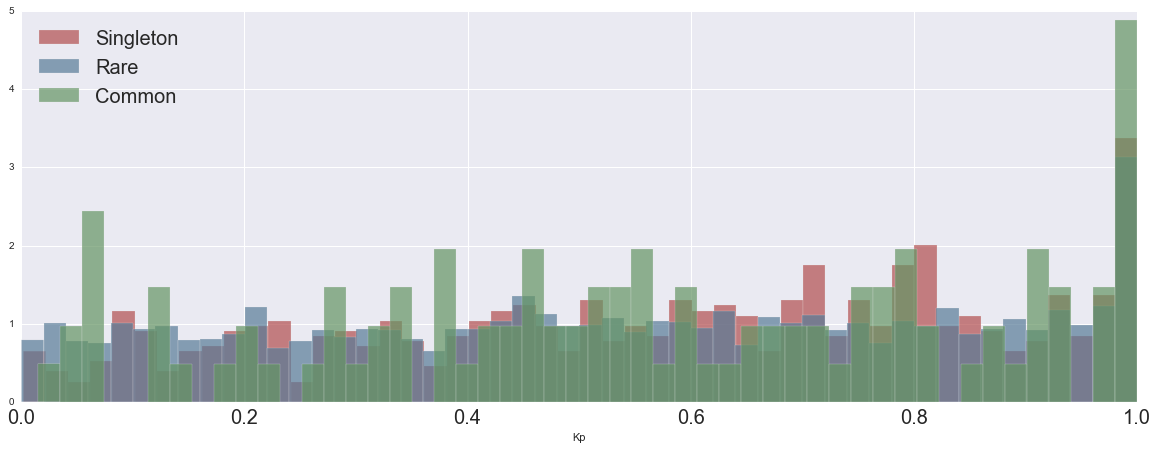

In [88]:
fig,ax = plt.subplots(figsize=(20,7))
sns.distplot(sng["Kp"],norm_hist=True,ax=ax,bins=50,color=pal[0],label="Singleton",kde=False,hist_kws={"alpha":0.7})
sns.distplot(rar["Kp"],norm_hist=True,ax=ax,bins=50,color=pal[1],label="Rare",kde=False,hist_kws={"alpha":0.7})
sns.distplot(cmn["Kp"],norm_hist=True,ax=ax,bins=50,color=pal[2],label="Common",kde=False,hist_kws={"alpha":0.7})
plt.xlim([0,1])
plt.legend(loc="upper left",fontsize=20)
plt.show()

In [89]:
# Plot the weighted results

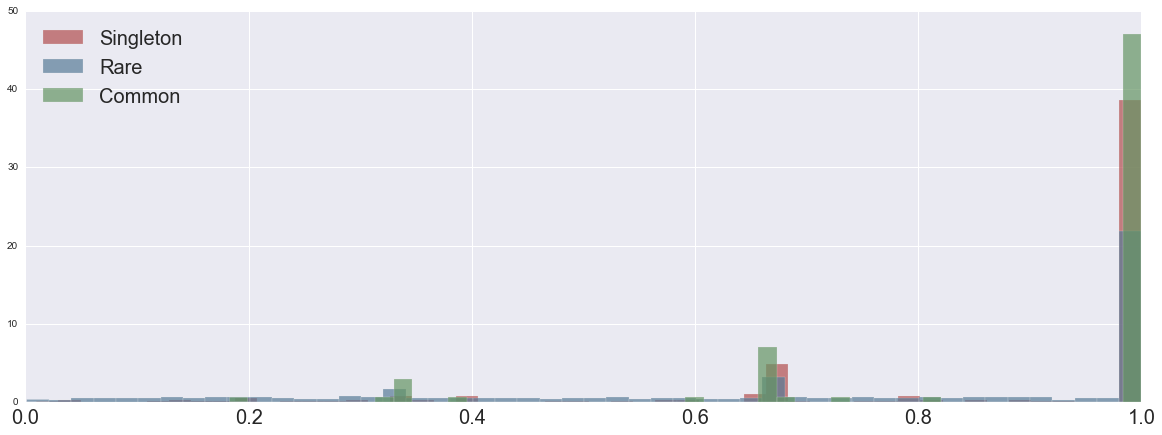

In [90]:
fig,ax = plt.subplots(figsize=(20,7))
ax.hist(sng.ix[~sng["wKp"].isnull(),"wKp"],histtype='bar',normed=True,bins=50,color=pal[0],label="Singleton",alpha=0.7)
ax.hist(rar.ix[~rar["wKp"].isnull(),"wKp"],histtype='bar',normed=True,bins=50,color=pal[1],label="Rare",alpha=0.7)
ax.hist(cmn.ix[~cmn["wKp"].isnull(),"wKp"],histtype='bar',normed=True,bins=50,color=pal[2],label="Common",alpha=0.7)
plt.xlim([0,1])
plt.legend(loc="upper left",fontsize=20)
plt.show()

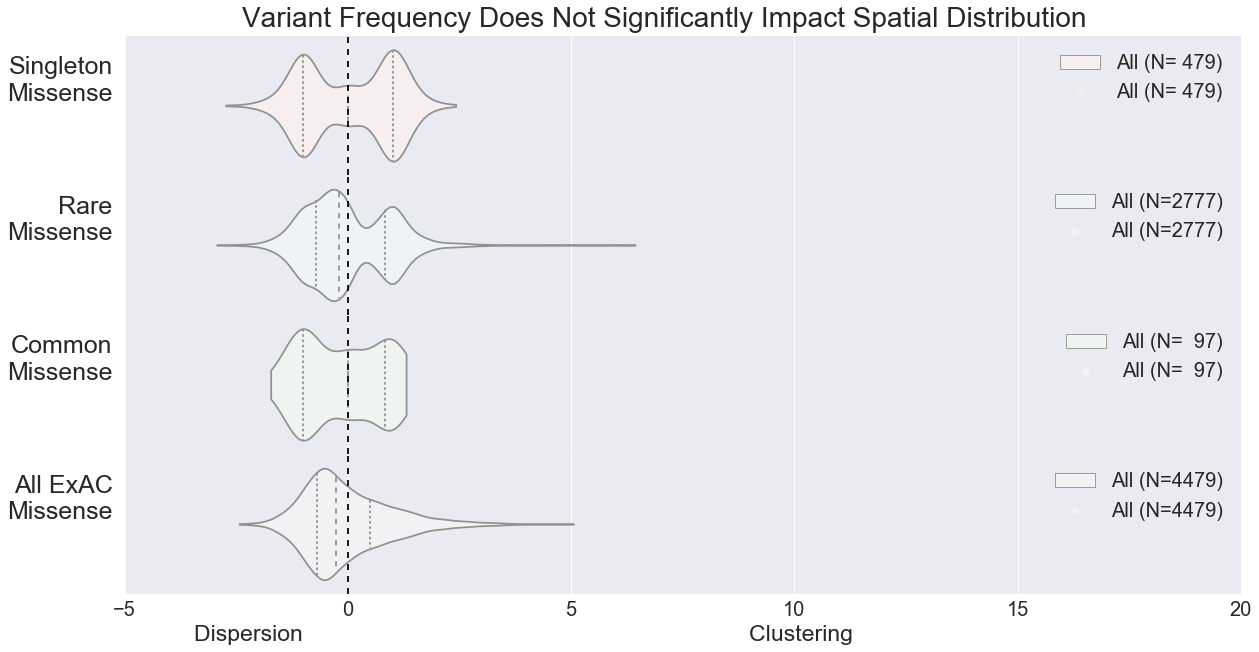

In [91]:
# Setup the plot
fig,ax = plt.subplots(4,1,figsize=(20,10),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC singleton missense SNVs
df    = prep_split(sng,weighted=True)
split = len(df["fdr"].drop_duplicates())>1
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[0],split=split,scale='width',cut=0,ax=ax[0])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[0],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[0])
ax[0].set_ylabel("Singleton\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC rare missense SNVs
df = prep_split(rar,weighted=True)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','wKz'] = np.nan
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[1],split=split,scale='width',cut=0,ax=ax[1])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[1],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[1])
ax[1].set_ylabel("Rare\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC common missense SNVs
df = prep_split(cmn,weighted=True)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','wKz'] = np.nan
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[2],split=split,scale='width',cut=0,ax=ax[2])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[2],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[2])
ax[2].set_ylabel("Common\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC common missense SNVs
df = prep_split(ns,weighted=True)
split = len(df["fdr"].drop_duplicates())>1
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','wKz'] = np.nan
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[3],split=split,scale='width',cut=0,ax=ax[3])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[3],orient='h',split=split,edgecolor='white',size=10,lw=2,ax=ax[3])
ax[3].set_ylabel("All ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*70,' '*50),fontsize=23)
for x in ax:
    x.axvline(x=0,c='black',ls='dashed')
plt.xlim([-5,20])
plt.suptitle("Variant Frequency Does Not Significantly Impact Spatial Distribution",fontsize=28,y=0.94)
plt.show()

In [92]:
print "Mann-Whitney U Comparisons"
u,p = mannwhitneyu(sng["wKz"],rar["wKz"])
print "Singleton-Rare:   p=%g"%p
u,p = mannwhitneyu(rar["wKz"],cmn["wKz"])
print "Rare-Common:      p=%g"%p
u,p = mannwhitneyu(sng["wKz"],cmn["wKz"])
print "Singleton-Common: p=%g"%p
u,p = mannwhitneyu(ns["wKz"],sng["wKz"])
print "All-Singleton:    p=%4.2g"%p
u,p = mannwhitneyu(ns["wKz"],rar["wKz"])
print "All-Rare:         p=%4.2g"%p
u,p = mannwhitneyu(ns["wKz"],cmn["wKz"])
print "All-Common:       p=%4.2g"%p

Mann-Whitney U Comparisons
Singleton-Rare:   p=2.00879e-56
Rare-Common:      p=0.604767
Singleton-Common: p=8.90313e-11
All-Singleton:    p=8e-70
All-Rare:         p=0.00026
All-Common:       p=0.89
